<a href="https://colab.research.google.com/github/spinadelima73/curso-javascript-projeto-usuarios/blob/master/Graficos_Pandas_Estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn
!pin instal plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: pin: command not found


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np


In [4]:
nomes = pd.read_excel('/content/Nomes.xlsx')

In [5]:
nomes


,Nome,Escolaridade,Estado Civil,idade,Credito,Extrato Jul,Extrato Ago,Extrato Set,Extrato Out
0,Joao,1,1,22,1000,1300,2300,1233,2300
1,Maria,2,2,34,1500,1500,3455,2311,4505
2,Jose,3,2,33,20000,15500,23000,12450,2345
3,Katia,3,2,22,15000,2300,2333,234,1456
4,Antonio,2,3,33,2500,4500,4533,5432,3453
5,Joaquim,1,1,56,1400,900,2300,6543,2345
6,Cristina,1,2,33,5600,6700,3400,2344,1232
7,Barbara,3,2,45,4000,3456,9899,5534,4565
8,Yago,2,1,16,2000,2300,234,444,665
9,Nicole,3,1,23,10000,23400,4522,5667,890


In [6]:
nomes_group = nomes.groupby(['Escolaridade']).mean().reset_index()
nomes_group

,Escolaridade,Estado Civil,idade,Credito,Extrato Jul,Extrato Ago,Extrato Set,Extrato Out
0,1,1.333333,37.000000,2666.666667,2966.666667,2666.666667,3373.333333,1959.000000
1,2,2.000000,27.666667,2000.000000,2766.666667,2740.666667,2729.000000,2874.333333
2,3,1.833333,38.833333,18166.666667,21295.500000,14309.000000,16888.000000,11279.666667


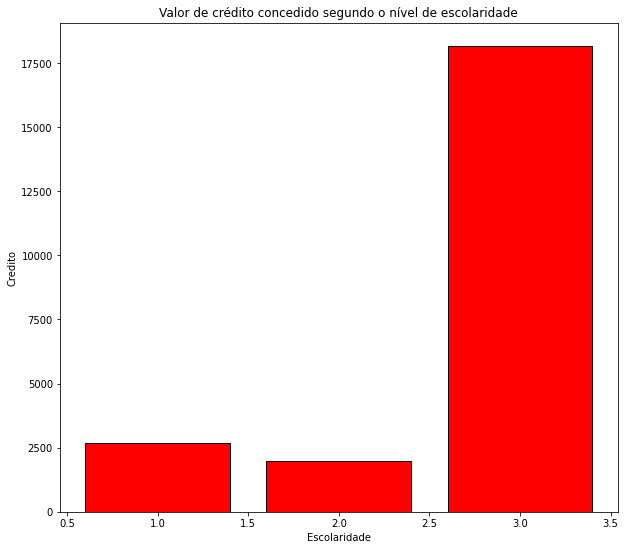

In [7]:
plt.figure(figsize=(10, 9))

plt.xlabel("Escolaridade")
plt.ylabel("Credito")

plt.title("Valor de crédito concedido segundo o nível de escolaridade")

plt.bar(nomes_group['Escolaridade'], nomes_group['Credito'], align='center',
        color='Red', linewidth=1, edgecolor='black');

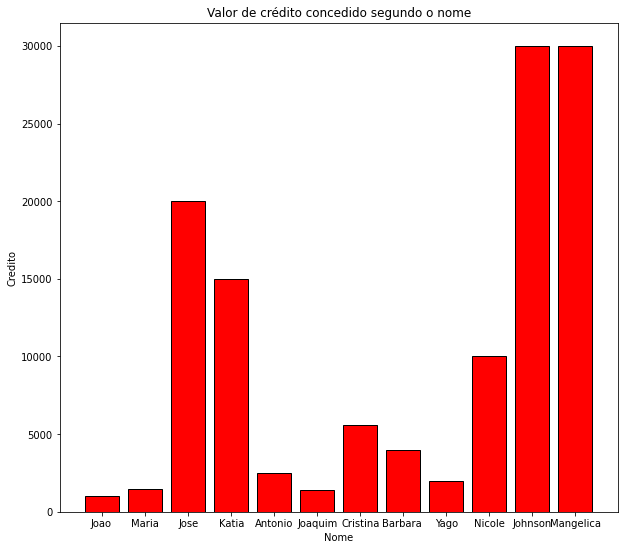

In [8]:
plt.figure(figsize=(10, 9))

plt.xlabel("Nome")
plt.ylabel("Credito")

plt.title("Valor de crédito concedido segundo o nome")

plt.bar(nomes['Nome'], nomes['Credito'], align='center',
        color='Red', linewidth=1, edgecolor='black');

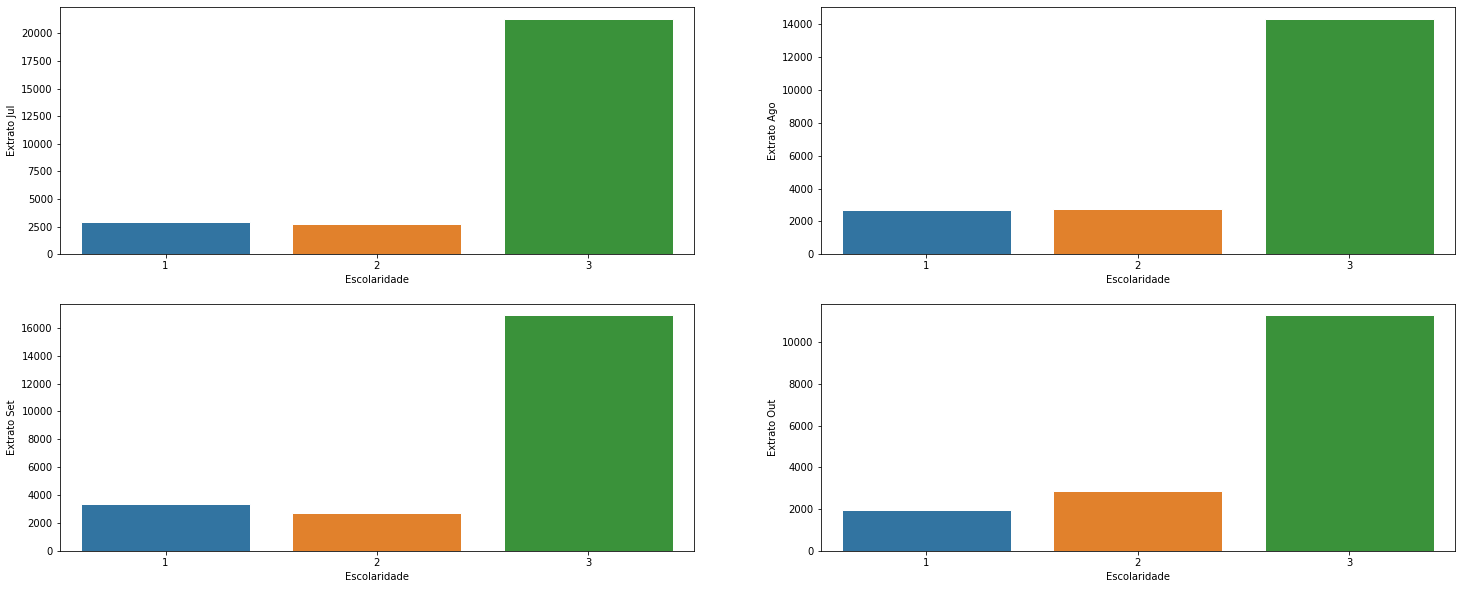

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(25,10))

sns.set_style("dark")

sns.barplot(data=nomes_group, x="Escolaridade", y="Extrato Jul", ax=axes[0,0]);
sns.barplot(data=nomes_group, x="Escolaridade", y="Extrato Ago", ax=axes[0,1]);
sns.barplot(data=nomes_group, x="Escolaridade", y="Extrato Set", ax=axes[1,0]);
sns.barplot(data=nomes_group, x="Escolaridade", y="Extrato Out", ax=axes[1,1]);

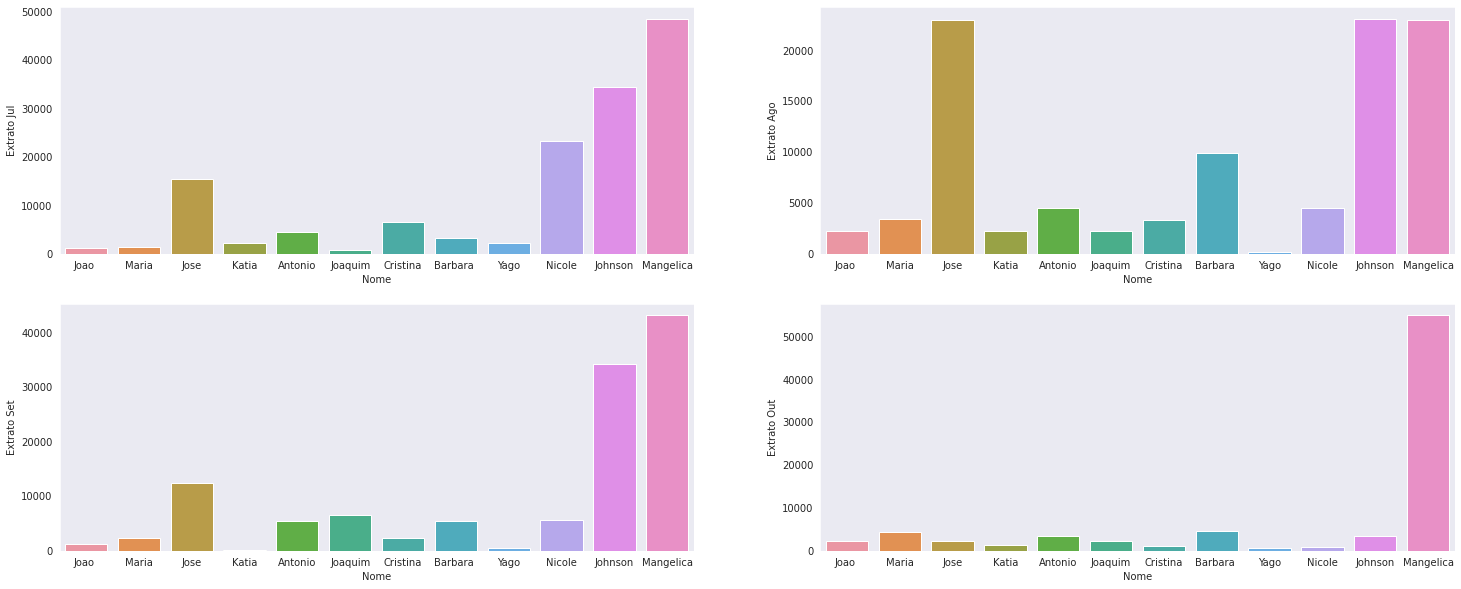

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(25,10))

sns.set_style("dark")

sns.barplot(data=nomes, x="Nome", y="Extrato Jul", ax=axes[0,0]);
sns.barplot(data=nomes, x="Nome", y="Extrato Ago", ax=axes[0,1]);
sns.barplot(data=nomes, x="Nome", y="Extrato Set", ax=axes[1,0]);
sns.barplot(data=nomes, x="Nome", y="Extrato Out", ax=axes[1,1]);

In [12]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=nomes_group['Escolaridade'], 
    y=nomes_group['Extrato Jul'],
    marker_color='red',
    name='Extrato Jul'))

fig.add_trace(go.Bar(
    x=nomes_group['Escolaridade'],
    y=nomes_group['Extrato Ago'],
    marker_color='yellow',
    name='Extrato ago'
))

fig.add_trace(go.Bar(
    x=nomes_group['Escolaridade'],
    y=nomes_group['Extrato Set'],
    marker_color='green',
    name='Extrato set'
))

fig.add_trace(go.Bar(
    x=nomes_group['Escolaridade'],
    y=nomes_group['Extrato Out'],
    marker_color='blue',
    name='Extrato out'
))

fig.update_layout(
    yaxis=dict(
        title='Extrato',
        titlefont_size=16,
        tickfont_size=16,
    ),
    xaxis=dict(
        title='Nível de escolaridade',
        titlefont_size=16,
        tickfont_size=16,
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ))

fig.show()

# Salvando o gráfico interativo
fig.write_html("Extrato.html")

In [13]:
nomes_group = nomes.groupby(['idade']).mean().reset_index()
nomes_group

,idade,Escolaridade,Estado Civil,Credito,Extrato Jul,Extrato Ago,Extrato Set,Extrato Out
0,16,2.0,1.000000,2000.000000,2300.0,234.0,444.0,665.000000
1,22,2.0,1.500000,8000.000000,1800.0,2316.5,733.5,1878.000000
2,23,3.0,1.000000,10000.000000,23400.0,4522.0,5667.0,890.000000
3,33,2.0,2.333333,9366.666667,8900.0,10311.0,6742.0,2343.333333
4,34,2.0,2.000000,1500.000000,1500.0,3455.0,2311.0,4505.000000
5,45,3.0,2.000000,4000.000000,3456.0,9899.0,5534.0,4565.000000
6,55,3.0,2.000000,30000.000000,41558.5,23050.0,38721.5,29211.000000
7,56,1.0,1.000000,1400.000000,900.0,2300.0,6543.0,2345.000000


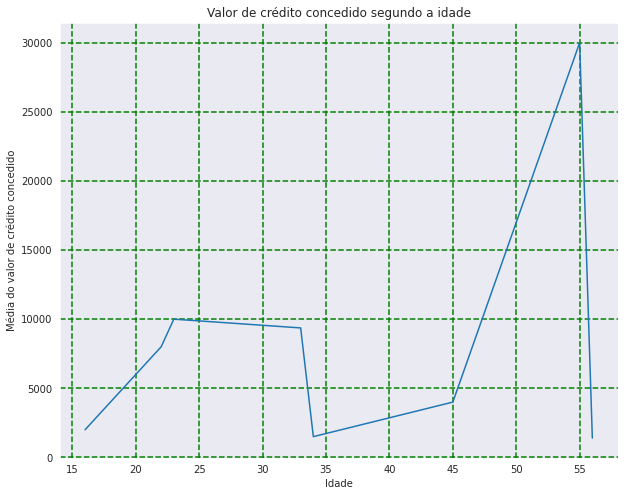

In [14]:
plt.figure(figsize=(10, 8))

plt.xlabel("Idade")
plt.ylabel("Média do valor de crédito concedido")

plt.title("Valor de crédito concedido segundo a idade")

plt.plot(nomes_group['idade'], nomes_group['Credito']);

plt.grid(b=True, color='Green', linestyle='--', linewidth=1.5);

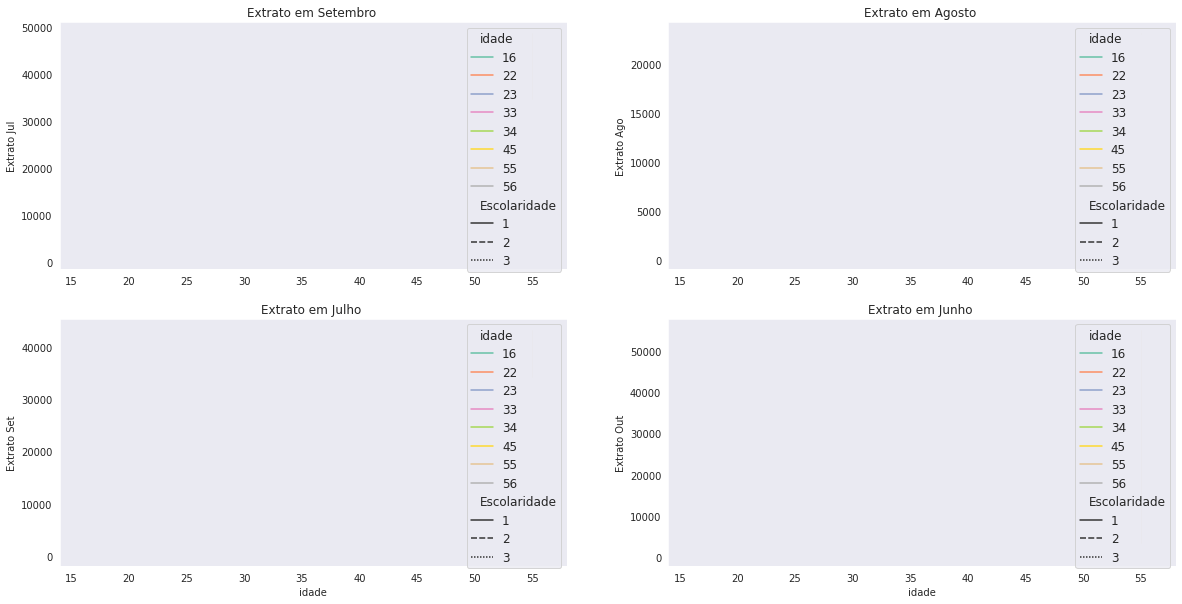

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.set_theme(style="darkgrid")

sns.lineplot(data=nomes, x="idade", y="Extrato Jul", hue='idade', style="Escolaridade", ax=axes[0,0], palette='Set2').set(title='Extrato em Setembro ', xlabel=None);
sns.lineplot(data=nomes, x="idade", y="Extrato Ago", hue='idade', style="Escolaridade", ax=axes[0,1], palette='Set2').set(title='Extrato em Agosto ', xlabel=None);
sns.lineplot(data=nomes, x="idade", y="Extrato Set", hue='idade', style="Escolaridade", ax=axes[1,0], palette='Set2').set(title='Extrato em Julho ');
sns.lineplot(data=nomes, x="idade", y="Extrato Out", hue='idade', style="Escolaridade", ax=axes[1,1], palette='Set2').set(title='Extrato em Junho ');


In [18]:
## Funções Trigonometricas ##
#criar um matriz com a função linspace da numpy

t = np.linspace(0.0,2.0,100)

In [19]:
t


array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

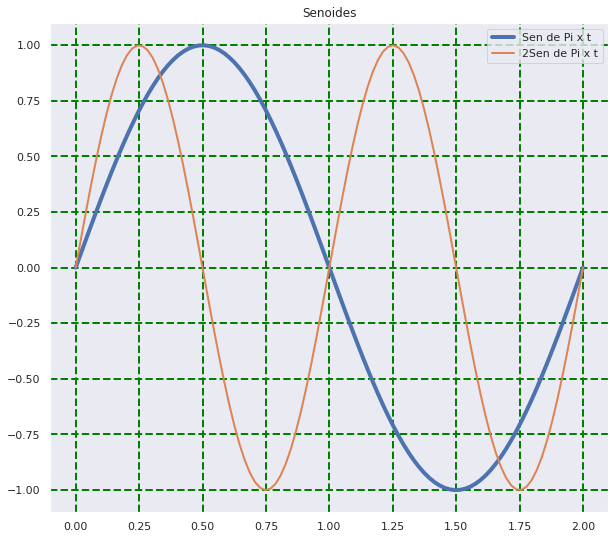

In [37]:
#criar outras duas matrizes com funções trigonometricas
f1 = np.sin(np.pi*t)
f2 = np.sin(2*np.pi*t)

plt.figure(figsize=(10,9))

plt.plot(t,f1,linewidth=4.0,label='Sen de Pi x t')
plt.plot(t,f2,linewidth=2.0, label='2Sen de Pi x t')
plt.legend()
plt.title('Senoides')
plt.grid(b=True, color='Green',linestyle='--',linewidth=2.0)

In [38]:
## Diagrama de Correlação ##
nome= pd.read_excel('/content/Nomes.xlsx')

In [39]:
nome


,Nome,Escolaridade,Estado Civil,idade,Credito,Extrato Jul,Extrato Ago,Extrato Set,Extrato Out
0,Joao,1,1,22,1000,1300,2300,1233,2300
1,Maria,2,2,34,1500,1500,3455,2311,4505
2,Jose,3,2,33,20000,15500,23000,12450,2345
3,Katia,3,2,22,15000,2300,2333,234,1456
4,Antonio,2,3,33,2500,4500,4533,5432,3453
5,Joaquim,1,1,56,1400,900,2300,6543,2345
6,Cristina,1,2,33,5600,6700,3400,2344,1232
7,Barbara,3,2,45,4000,3456,9899,5534,4565
8,Yago,2,1,16,2000,2300,234,444,665
9,Nicole,3,1,23,10000,23400,4522,5667,890


In [41]:
nome.drop(['Nome'],axis=1,inplace=True)

In [42]:
nome

,Escolaridade,Estado Civil,idade,Credito,Extrato Jul,Extrato Ago,Extrato Set,Extrato Out
0,1,1,22,1000,1300,2300,1233,2300
1,2,2,34,1500,1500,3455,2311,4505
2,3,2,33,20000,15500,23000,12450,2345
3,3,2,22,15000,2300,2333,234,1456
4,2,3,33,2500,4500,4533,5432,3453
5,1,1,56,1400,900,2300,6543,2345
6,1,2,33,5600,6700,3400,2344,1232
7,3,2,45,4000,3456,9899,5534,4565
8,2,1,16,2000,2300,234,444,665
9,3,1,23,10000,23400,4522,5667,890


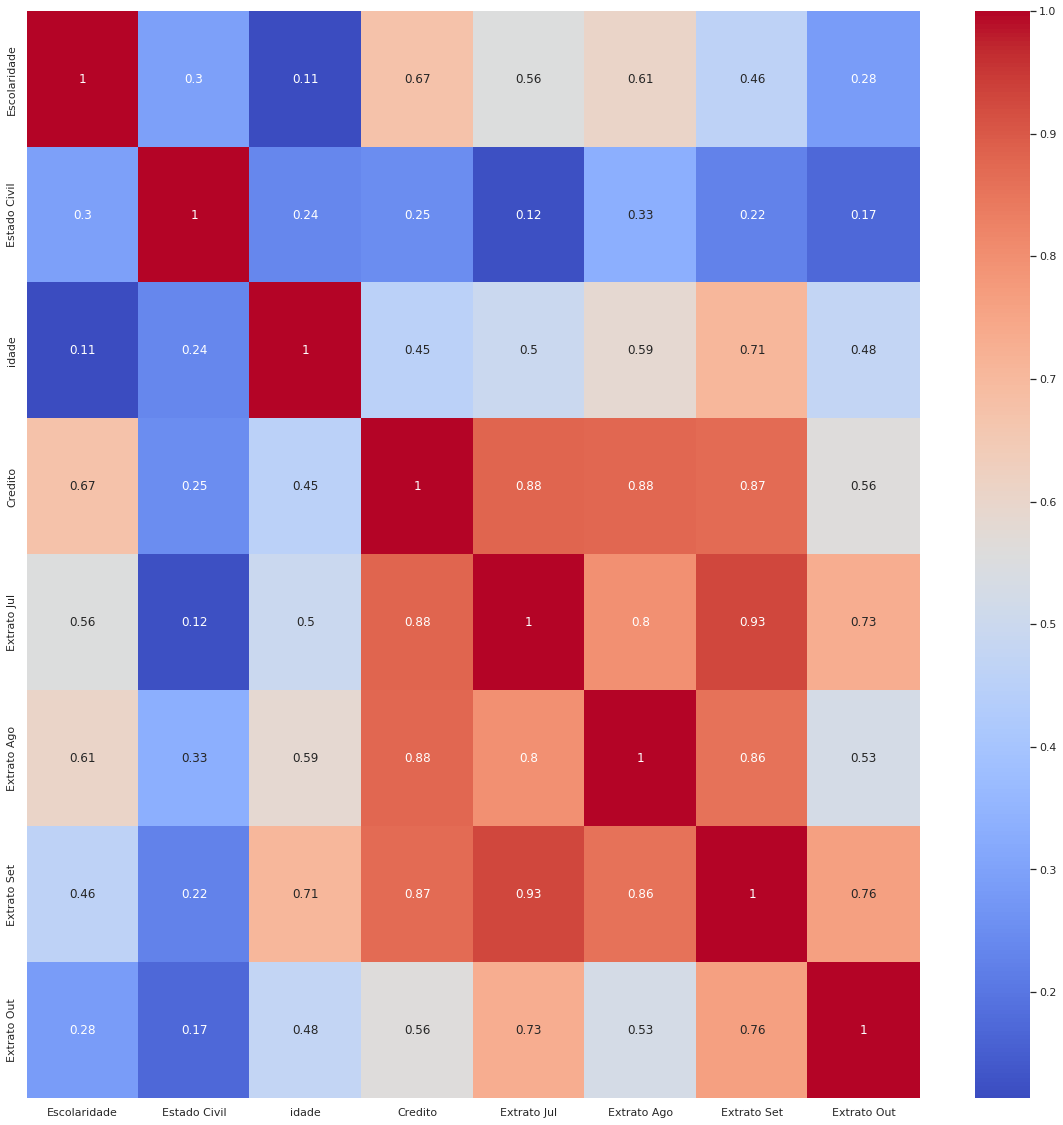

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(nome.corr(),annot= True,cmap ="coolwarm")

In [49]:
## Grafico de Violin ##

nome = pd.read_excel('/content/Nomes.xlsx')
nome

,Nome,Escolaridade,Estado Civil,idade,Credito,Extrato Jul,Extrato Ago,Extrato Set,Extrato Out
0,Joao,1,1,22,1000,1300,2300,1233,2300
1,Maria,2,2,34,1500,1500,3455,2311,4505
2,Jose,3,2,33,20000,15500,23000,12450,2345
3,Katia,3,2,22,15000,2300,2333,234,1456
4,Antonio,2,3,33,2500,4500,4533,5432,3453
5,Joaquim,1,1,56,1400,900,2300,6543,2345
6,Cristina,1,2,33,5600,6700,3400,2344,1232
7,Barbara,3,2,45,4000,3456,9899,5534,4565
8,Yago,2,1,16,2000,2300,234,444,665
9,Nicole,3,1,23,10000,23400,4522,5667,890


In [53]:
fig= px.violin(nome,x="Estado Civil",y='Credito',color='Escolaridade',box=True,title = "Valor do Credito ")
fig.show()

In [54]:
## Grafico de Dispersao - Scatter

nome

,Nome,Escolaridade,Estado Civil,idade,Credito,Extrato Jul,Extrato Ago,Extrato Set,Extrato Out
0,Joao,1,1,22,1000,1300,2300,1233,2300
1,Maria,2,2,34,1500,1500,3455,2311,4505
2,Jose,3,2,33,20000,15500,23000,12450,2345
3,Katia,3,2,22,15000,2300,2333,234,1456
4,Antonio,2,3,33,2500,4500,4533,5432,3453
5,Joaquim,1,1,56,1400,900,2300,6543,2345
6,Cristina,1,2,33,5600,6700,3400,2344,1232
7,Barbara,3,2,45,4000,3456,9899,5534,4565
8,Yago,2,1,16,2000,2300,234,444,665
9,Nicole,3,1,23,10000,23400,4522,5667,890


In [59]:
fig=px.scatter(nome,x ='Extrato Jul',y='Credito',color='Estado Civil',title='Sintese da Situaçao dos clientes')

fig.show()

#Salvando o grafico interativo

fig.write_html("Sintese dos clientes.html")